In [1]:
from IPython.display import display, Markdown
def latexify(x):
    out = '$' + x + '$'
    return out

def lprint(x):
    display(Markdown(latexify(latex(x))))

# Local Bifurcation Theory

As per bt_global, we care about solutions to equations of the form 

$$ F(\lambda, x) = 0$$

Where

$$F : \mathbb{R} \times X \rightarrow Y $$

We assume that $F(\lambda,0)=0$, what we want to find are solutions not on the "x-axis"

## A very simple example

Lets cook up a toy function to experiment with, in the literature $X$ is taken to be a generic Banach space, for now we'll only consider the case when $X = \mathbb{R}^n$, and for this example, just set $X = \mathbb{R}$

Define:

$$ F : \mathbb{R} \times \mathbb{R} \rightarrow \mathbb{R}$$

$$F(\lambda, x) = x(x-\lambda)$$

We see that $x=0$ does indeed lead to a solution of $F$, regardless of the value of $\lambda$

In [2]:
var('x')
var('l', latex_name=r'\lambda') # raw string kills off some random error
f(x,l) = x*(x-l)
lprint(f)

$ \left( x, {\lambda} \right) \ {\mapsto} \ -{\left({\lambda} - x\right)} x $

We may use the ```solve``` functionality of sage to find the zero set of this equation

In [3]:
lprint(solve(f,x))

$ \left[x = {\lambda}, x = 0\right] $

Now we can rearrange the first option to get a function in terms of $x$:

In [4]:
condition = solve(f,x)[0]
lprint(solve(condition, l))

$ \left[{\lambda} = x\right] $

While this may seem trivial, it builds a blueprint to find harder zero sets

Now we can plot the zero set:

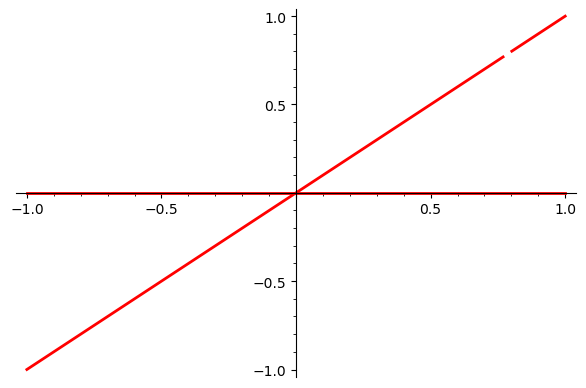

In [5]:
plot(x, thickness = 2, color = 'red') + plot(0, thickness = 2, color = 'red')

We usually consider $\lambda$ to be on the horizontal axis, and plot the solution set as a function of $\lambda$, with $x$ on the vertical axis

See that for this function, the zero set has two line components, meeting at $(0,0)$, we call this point a bifurcation point, and will now attempt use the theory set up in bt_global to prove it to be:

### The Necessary Condition

bt_global provides first a necessary condition for a bifurcation point, let's verify that $(0,0)$ can't be ruled out. The condition is that for $(\lambda_{0}, 0)$ to be a bifurcation point, we must have that:

$$\{0\} \neq \text{ker} \;\partial_{x}f[(\lambda_{0},0)]$$ 

This $\partial_{x}$ is defined to be the best linear approximation to the function $f(\lambda_{0}, \cdot) : \mathbb{R}^n \rightarrow \mathbb{R}^m$ 

i.e $\lambda$ is fixed. As such we have that:

$$\partial_{x}f[(\lambda_{0}, x_{0})] \in \mathcal{L}(\mathbb{R}^n, \mathbb{R}^m)$$

In this example we can think of $\partial_{x}f[(\lambda_{0}, x_{0})]$ as the best lines that approximate "lambda fixed slices" of $f$, if we imagine $f$ rising out of the page

This is essentially saying that we need the linear map to "lie flat" in a subspace (recall kernels of linear maps are always linear subspaces)

In this example we have that:

$$\partial_{x}f[(\lambda_{0}, x_{0})] \in \mathcal{L}(\mathbb{R}, \mathbb{R})$$

So in this case, we may compute the derivative:

In [6]:
lprint(f)

$ \left( x, {\lambda} \right) \ {\mapsto} \ -{\left({\lambda} - x\right)} x $

In [7]:
lprint(f.diff())

lprint(f.diff(x)(0,l)) # only differentiate with respect to x, lambda is assummed to be constant

$ \left( x, {\lambda} \right) \ {\mapsto} \ \left(-{\lambda} + 2 \, x,\,-x\right) $

$ -{\lambda} $

So we see that $\partial_{x}f[(\lambda_{0}, 0)] = -\lambda_{0} $, viewed as the linear operator $-\lambda_{0} : \mathbb{R} \rightarrow \mathbb{R}$ which sends: $x \rightarrow  \lambda_{0}x$

Which only has the nontrivial kernel of $\mathbb{R}$ when $\lambda_{0} = 0$

Therefore the only potential bifurcation point for this example is $(0,0)$, the rest of the horizontal axis cannot.

### The sufficient condition

Sometimes all we care about is ruling out a point's potential to be a bifurcation point. But what if we want to prove that it is definitely a bifurcation point?

Now we require theorem 8.3.1 from bt_global:

Suppose that

$$ f: \mathbb{R} \times \mathbb{R}^n \rightarrow \mathbb{R}^m $$ is at least $C^2$,

and that $$f(\lambda, 0) = 0 \;\; \text{  for all  } \;\; \lambda \in \mathbb{R}$$

Denote $L = \partial_{x}f[(\lambda_{0},0)]$

Then require that $\text{ker}(L)$ is one dimensional and of the form:

$$\text{ker}L = \{\xi \in \mathbb{R}^n \;:\; \xi = a\xi_{0} \;\; \text{for some } \; a \in \mathbb{R} \}, \;\;\; \xi_{0} \in \mathbb{R}^n \setminus \{0\} $$

Then $(\lambda_{0}, 0)$ is a bifurcation point if the transversality condition holds:

$$\partial^2_{\lambda, x} \; f[(\lambda_{0}, 0)](1, \xi_{0}) \notin \text{range}(L) $$

This second partial is a bit tricky to understand, since it it evaluates to yield a linear map itself, we see that if 

$$ f: \mathbb{R} \times \mathbb{R}^n \rightarrow \mathbb{R}^m $$

then (setting $\mathbb{R}^n = X$ and $\mathbb{R} = Y$, so that $f : X \times Y \rightarrow \mathbb{R}$):

$$ \partial_{x} \:f : \mathbb{R} \times \mathbb{R}^n \rightarrow \mathcal{L}(\mathbb{R}^n,\mathbb{R})$$

and then we can take another derivative at $(x_{0}, y_{0})$ to get:

$$\partial_{y} (\partial_{x})[(x_{0}, y_{0})] \in \mathcal{L}(\mathbb{R}, \mathcal{L}(\mathbb{R}^n, \mathbb{R}))$$

i.e. plugging in a value for $y \in \mathbb{R}$ will give a linear map that can be interrogated with a value $x \in \mathbb{R}^n$ to give a bilinearly optimal* value. This value along with first order derivative and intercept information can by used to approximate $f(x,y)$. The key fact is that this whole process was catalysed by the choice $(x_{0},y_{0})$, but then this point plays no further role, simply acting as a centre from which the error of the approximation increases, as our $x,y$ choices are moved further away.

*optimal for the choice of $(x_{0}, y_{0})$

So in the wording of the theorem, we evaluate this bilinear map at $(1,\xi_{0})$ and hope the value doesn't lie in the range of our linear operator derivative.

#### Applying to the toy example

So now we first need to work out what this $\xi_{0}$ is

We saw that at $(0,0)$, we have that $\partial_{x}f[(0, 0)] = 0 $, which viewed as a map $\mathbb{R} \rightarrow \mathbb{R}$ has kernel $\mathbb{R}$,

So we may set $\xi_{0} = 1$, so in the format of the theorem: 

$$\text{ker}L = \{\xi \in \mathbb{R} \;:\; \xi = a \cdot 1 \;\; \text{for some } \; a \in \mathbb{R} \}$$

A rather convoluted way of constructing $\mathbb{R}$

Now that we have our $\xi_{0}$ we need to compute the derivative $\partial^2_{\lambda, x}f \;\; = \;\; \partial_{\lambda}\partial_{x}f$

In [8]:
lprint(f)

$ \left( x, {\lambda} \right) \ {\mapsto} \ -{\left({\lambda} - x\right)} x $

In [9]:
lprint(f.diff(x))
lprint(f.diff(x).diff(l))

$ \left( x, {\lambda} \right) \ {\mapsto} \ -{\lambda} + 2 \, x $

$ \left( x, {\lambda} \right) \ {\mapsto} \ -1 $

This is a constant function so certainly: 

$$\partial^2_{\lambda, x} \; f[(\lambda_{0}, 0)](1, \xi_{0}) \;\; = \;\; \partial^2_{\lambda, x} \; f[(0, 0)](1, 1) = -1$$

So we will have that $(0,0)$ is a bifurcation point if $-1 \notin \text{range}(L)$

What is $\text{range}(L)$?, in linear algebra terms it would be the 'image' of  $\partial_{x}f[(0, 0)] = 0 $, which is just the singleton set $\{0\}$. 

Clearly $-1 \notin \{0\}$ therefore we conclude that the point $(0,0)$ is a bifurcation point. And furthermore that it is the only bifurcation point.

In [10]:
lprint(f.diff()(0,0))

$ \left(0,\,0\right) $

#### What about Taylor series?

We can also use the Taylor series to obtain this information:

In [11]:
lprint(f.taylor((x,0),(l,0), 1))

$ \left( x, {\lambda} \right) \ {\mapsto} \ 0 $

Observe that this is of the form: $ax + b\lambda + c$, so we can see that $a = 0$ implies that that  $\partial_{x}f[(0, 0)] = 0 $. 

In [12]:
lprint(f.taylor((x,0),(l,0), 2))

$ \left( x, {\lambda} \right) \ {\mapsto} \ -{\lambda} x + x^{2} $

We see that these values are obtained from (get scaled down with factorials)

In [13]:
lprint(f.diff()(0,0))
lprint(f.diff().diff()(0,0))

$ \left(0,\,0\right) $

$ \left(\begin{array}{rr}
2 & -1 \\
-1 & 0
\end{array}\right) $

TODO - link this

## A harder example

Lets consider a more involved function:

In [14]:
var('x')
var('l', latex_name=r'\lambda') # raw string kills off some random error}
f(x,l) = x*(x-sin(l))*(exp(l) + x^2 -4)
lprint(f)

$ \left( x, {\lambda} \right) \ {\mapsto} \ {\left(x^{2} + e^{{\lambda}} - 4\right)} {\left(x - \sin\left({\lambda}\right)\right)} x $

We see that this map will be smooth, by the product rule

In [15]:
lprint(solve(f,l))

$ \left[{\lambda} = \log\left(-x^{2} + 4\right), {\lambda} = \arcsin\left(x\right)\right] $

In [16]:
lprint(solve(f,x))

$ \left[x = -\sqrt{-e^{{\lambda}} + 4}, x = \sqrt{-e^{{\lambda}} + 4}, x = \sin\left({\lambda}\right), x = 0\right] $

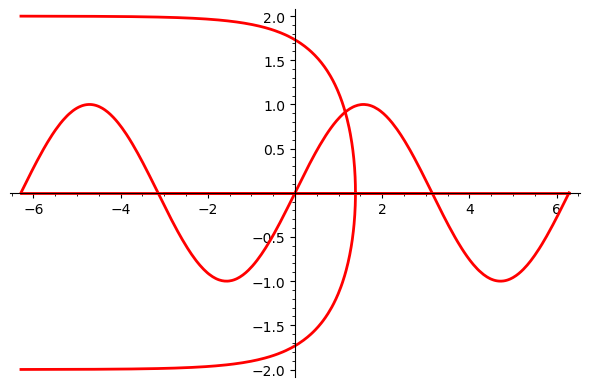

In [17]:
plot(-sqrt(-exp(x) + 4), (x,-2*pi,ln(4)), thickness = 2, color = 'red') \
+ plot(sqrt(-exp(x) + 4), (x,-2*pi,ln(4)), thickness = 2, color = 'red')+  plot(0, (x,-3,3), thickness = 2, color = 'red') \
+ plot(sin(x), (x,-2*pi,2*pi), thickness = 2, color = 'red')+  plot(0, (x,-2*pi,2*pi), thickness = 2, color = 'red') \

We see that this zero set is much more complicated, viewing the Taylor polynomial we see that there is a lot more going on:

In [18]:
lprint(f.taylor(x, l, 2))

$ \left( x, {\lambda} \right) \ {\mapsto} \ {\lambda}^{4} + {\left(6 \, {\lambda}^{2} - 3 \, {\lambda} \sin\left({\lambda}\right) + e^{{\lambda}} - 4\right)} {\left({\lambda} - x\right)}^{2} + {\lambda}^{2} e^{{\lambda}} - {\left(4 \, {\lambda}^{3} + 2 \, {\lambda} e^{{\lambda}} - {\left(3 \, {\lambda}^{2} + e^{{\lambda}} - 4\right)} \sin\left({\lambda}\right) - 8 \, {\lambda}\right)} {\left({\lambda} - x\right)} - 4 \, {\lambda}^{2} - {\left({\lambda}^{3} + {\lambda} e^{{\lambda}} - 4 \, {\lambda}\right)} \sin\left({\lambda}\right) $

Evaluating at $(0,0)$:

In [19]:
lprint(f.taylor((x,0), (l,0), 2))

$ \left( x, {\lambda} \right) \ {\mapsto} \ 3 \, {\lambda} x - 3 \, x^{2} $

Computing $\partial_{x}f[(\lambda_{0}, 0)]$

In [20]:
lprint(f.diff())

$ \left( x, {\lambda} \right) \ {\mapsto} \ \left(2 \, {\left(x - \sin\left({\lambda}\right)\right)} x^{2} + {\left(x^{2} + e^{{\lambda}} - 4\right)} {\left(x - \sin\left({\lambda}\right)\right)} + {\left(x^{2} + e^{{\lambda}} - 4\right)} x,\,-{\left(x^{2} + e^{{\lambda}} - 4\right)} x \cos\left({\lambda}\right) + {\left(x - \sin\left({\lambda}\right)\right)} x e^{{\lambda}}\right) $

In [21]:
lprint(f.diff(x)(0,l)) # only differentiate with respect to x, lambda is assummed to be constant

$ -{\left(e^{{\lambda}} - 4\right)} \sin\left({\lambda}\right) $

In the previous example we saw that the the kernel of this "one dimensional linear operator" was non-trivial if and only if it was the zero operator.

Which in this case happends when $\lambda$ is a multiple of $\pi$, or $\lambda = \ln4$, but this was only the necessary condition, we will now show that all of these possibilities are in fact bifurcation points:

See that for each time $L = \partial_{x}f[(\lambda_{0}, 0)]$ has non-trivial kernel, we have that $\text{ker} L = \mathbb{R}$ and $\text{range}(L) = \{0\}$, so we may take $\xi_{0} = 1$ in each case

Now to compute $$\partial^2_{\lambda, x} \; f[(\lambda_{0}, 0)](1, \xi_{0})$$

Luckily in this case the value of $\partial^2_{\lambda, x} \; f[(\lambda_{0}, 0)]$ is of the form: $\mathcal{L}(\mathbb{R}, \mathcal{L}(\mathbb{R}, \mathbb{R}))$, and so collapses to just being able to be viewed as a scalar. So we just need to evaluate the derivative at the potential bifurcation points and check that they aren't zero.

Since the range of the $\partial_{x}$ here is the set $\{0\}$

In [22]:
lprint(f.diff(x).diff(l))

$ \left( x, {\lambda} \right) \ {\mapsto} \ -2 \, x^{2} \cos\left({\lambda}\right) - {\left(x^{2} + e^{{\lambda}} - 4\right)} \cos\left({\lambda}\right) + {\left(x - \sin\left({\lambda}\right)\right)} e^{{\lambda}} + x e^{{\lambda}} $

Check at $(0, \ln4)$

In [23]:
lprint(f.diff(x).diff(l)(0,ln(4)))

$ -4 \, \sin\left(2 \, \log\left(2\right)\right) $

See that this is non-zero since $2\log2$ is not a multiple of $\pi$

now check $(0,0)$

In [24]:
lprint(f.diff(x).diff(l)(0,0))

$ 3 $

Again non-zero so we have a bifurcation point

Now evaluate for all multiples of pi

In [25]:
var('k')
lprint(f.diff(x).diff(l)(0,k*pi))

$ -{\left(e^{\left(\pi k\right)} - 4\right)} \cos\left(\pi k\right) - e^{\left(\pi k\right)} \sin\left(\pi k\right) $

we see that this reduces to only the cosine evaluation, which means the expression is zero if and only if $e^{k \pi}  = 4$, which is not possible for integer k, so all the points we considered are bifurcations, and these are the only possible ones.

## Rod example

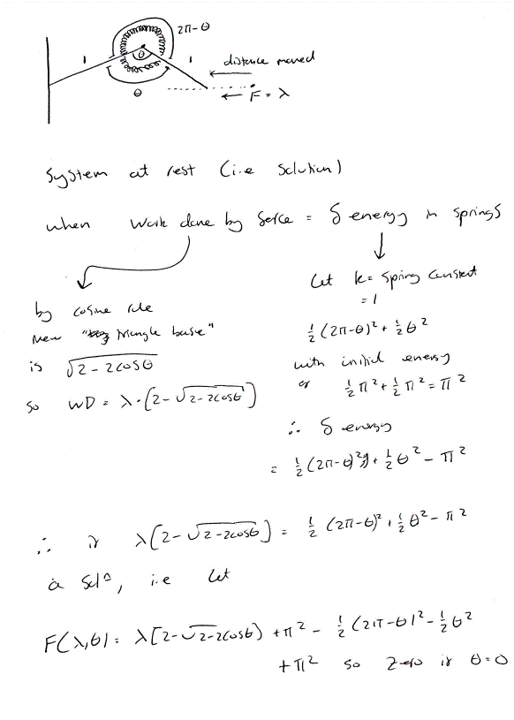

In [26]:
from IPython.display import Image
Image("springs.png")

Lets try a "real world" example

In [27]:
var('x')
var('l', latex_name=r'\lambda') # raw string kills off some random error}
f(x,l) = l*(2-sqrt(2-2*cos(x+pi))) -1/2*(2*pi -(x+pi))^2 -1/2*(x+pi)^2 + pi^2
lprint(f)

$ \left( x, {\lambda} \right) \ {\mapsto} \ \pi^{2} - \frac{1}{2} \, {\left(\pi + x\right)}^{2} - \frac{1}{2} \, {\left(\pi - x\right)}^{2} - {\lambda} {\left(\sqrt{-2 \, \cos\left(\pi + x\right) + 2} - 2\right)} $

In [28]:
lprint(solve(f,l))

$ \left[{\lambda} = -\frac{x^{2}}{\sqrt{2 \, \cos\left(x\right) + 2} - 2}\right] $

In [29]:
lprint(solve(f,x))

$ \left[x = -\sqrt{-{\lambda} \sqrt{2 \, \cos\left(x\right) + 2} + 2 \, {\lambda}}, x = \sqrt{-{\lambda} \sqrt{2 \, \cos\left(x\right) + 2} + 2 \, {\lambda}}\right] $

In [30]:
f(0, 4)

0

Now we see a problem, we cannot solve for $x$ in closed form, so plotting the zero set is more challenging. We can verify that for $x=0$, i.e $\theta = \pi$ so the rods are completely straight, that we have a solution. But what about for the rest?

We can use the implicit plot function to find the zero set of this function

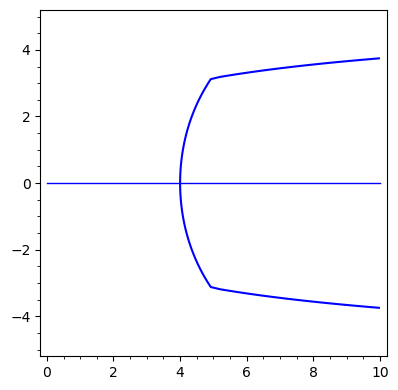

In [31]:
implicit_plot(f, (0,10), (-5,5)) + plot(0, (0,10))

This is interesting since it suggests that until we apply a large enough force, no movement will occur, but then afterwards the rods can bend either up or down

Evaluting the first derivative, see that 

In [32]:
lprint(f.diff(x))

$ \left( x, {\lambda} \right) \ {\mapsto} \ -\frac{{\lambda} \sin\left(\pi + x\right)}{\sqrt{-2 \, \cos\left(\pi + x\right) + 2}} - 2 \, x $

This evaluates to zero whenever $x=0$ (limits)

In [33]:
lprint(f.diff(x)(0,l))

$ 0 $

We see that all lambdas represent a possible bifurcation point

What about the second derivative?

In [34]:
lprint(f.diff(x).diff(l))

$ \left( x, {\lambda} \right) \ {\mapsto} \ -\frac{\sin\left(\pi + x\right)}{\sqrt{-2 \, \cos\left(\pi + x\right) + 2}} $

evaluate at $x = 0$

In [35]:
lprint(f.diff(x).diff(l)(0,0))

$ 0 $

It seems that out sufficient condition has not worked, we'll have to go back to the drawing board

This is wrong, need to have an odd derivative of x or somethign

We will try to use information from higher derivatives to prove that we have a bifurcation point. An easy way to find non-zero derivatives is to inspect the Taylor polynomial.

In [66]:
lprint(f.taylor((x,0),(l,0), 7))

$ \left( x, {\lambda} \right) \ {\mapsto} \ \frac{1}{23040} \, {\lambda} x^{6} - \frac{1}{192} \, {\lambda} x^{4} + \frac{1}{4} \, {\lambda} x^{2} - x^{2} $

Here evaluated at $(0,0)$, we can track down which derivatives evaluate to be non-zero.

In [67]:
lprint(f.diff(x).diff(x).diff(l))

$ \left( x, {\lambda} \right) \ {\mapsto} \ -\frac{\cos\left(\pi + x\right)}{\sqrt{-2 \, \cos\left(\pi + x\right) + 2}} + \frac{\sin\left(\pi + x\right)^{2}}{{\left(-2 \, \cos\left(\pi + x\right) + 2\right)}^{\frac{3}{2}}} $

In [68]:
lprint(f.diff(x).diff(x).diff(l)(0,0))

$ \frac{1}{2} $

Other derivatives will evaluate to zero.

Plotting the lowest order term $-x^2$ in this case

In [69]:
plot3d(-x^2, (x,-1,1),(l,-1,1), opacity=0.8) + plot3d(0, (x,-1,1),(l,-1,1), color='purple', opacity=0.8) + plot3d(0.01, (l,-0.01,0.01), (x,-1,1), color='black', opacity=1)

Graphics3d Object

We see that this is not locally anything like a bifurcation point, we may be worried that incorporating higher order terms will lead to a suggested bifurcation point, introducing ambiguity. We can dispel those worries, adding the next higher term we see:

In [81]:
plot3d((1/4)*l*x^2 -x^2, (x,-1,1),(l,-1,1), opacity=0.8) + plot3d(0, (x,-1,1),(l,-1,1), color='purple', opacity=0.8) + plot3d(0.01, (l,-0.01,0.01), (x,-1,1), color='black', opacity=1)

Graphics3d Object

Although the graph wants to rise up and cross the zero plane due to the $+\lambda x^2$ term, this cubic power gets outcompeted by the $x^2$ term, as will all the other terms that are of the form $\lambda x^{2k}$ which make up the rest of the Taylor series

But what about when we consider $(0,4)$?

from IPython.display import display, Markdown
def latexify(x):
    out = '$' + x + '$'
    return out

def lprint(x):
    display(Markdown(latexify(latex(x))))

In [70]:
lprint(f.taylor((x,0),(l,4), 7))

$ \left( x, {\lambda} \right) \ {\mapsto} \ \frac{1}{23040} \, {\left({\lambda} - 4\right)} x^{6} + \frac{1}{5760} \, x^{6} - \frac{1}{192} \, {\left({\lambda} - 4\right)} x^{4} - \frac{1}{48} \, x^{4} + \frac{1}{4} \, {\left({\lambda} - 4\right)} x^{2} $

We see that something interesting happens, now the $x^2$ term is gone, in fact 4 is the only value where $\partial_{x}^2 = 0$, and so for a small area around $(0,4)$, the  $\frac{1}{4}(\lambda - 4)x^2$ term will dominate and the function will look like:

In [79]:
plot3d((1/4)*(l-4)*x^2, (x,-2,2),(l,2,6), opacity=0.8) + plot3d(0, (x,-2,2),(l,2,6), color='purple', opacity=0.8) + plot3d(0.01, (l,-0.01,0.01), (x,2,6), color='black', opacity=1)

Graphics3d Object

Now we see why the birfucation point is here, since the $\lambda$ term induces a rise up that passes through the zero-plane. We see this approximation of the function is actually already fairly accurate:

In [80]:
plot3d(f, (x,-2,2),(l,2,6), opacity=0.8) + plot3d(0, (x,-2,2),(l,2,6), color='purple', opacity=0.8) + plot3d(0.01, (l,-0.01,0.01), (x,2,6), color='black', opacity=1)

Graphics3d Object